In [1]:
import numpy as np
import matplotlib.pyplot as plt

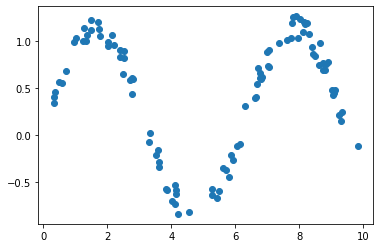

In [63]:
noise = np.random.random((100, 1)) * 0.3
X = np.random.random((100, 1)) * 10
X.sort(axis=0)
Y = np.sin(X) + noise
plt.scatter(X, Y)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

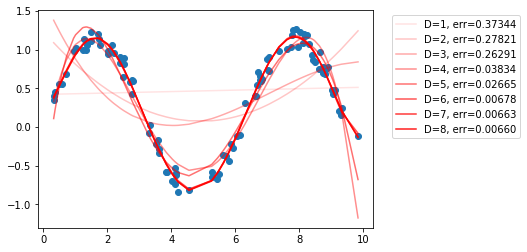

In [64]:
D = 9
encs_models = [(
    PolynomialFeatures(degree=i),
    LinearRegression()
) for i in range(1, D)]

plt.scatter(X, Y)
for i, (enc, model) in enumerate(encs_models, start=1):
    X2 = enc.fit_transform(X)
    model.fit(X2, Y)
    Yhat = model.predict(X2)
    err = mean_squared_error(Y, Yhat)
    plt.plot(X, Yhat, color='red', alpha=1. / D * i, label=f'D={i}, err={err:.5f}')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

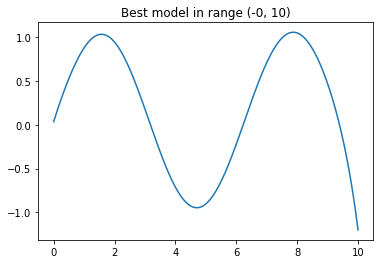

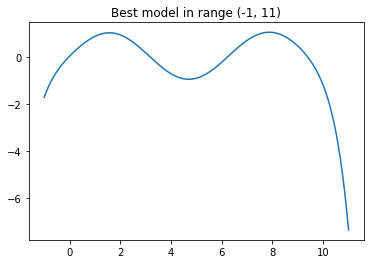

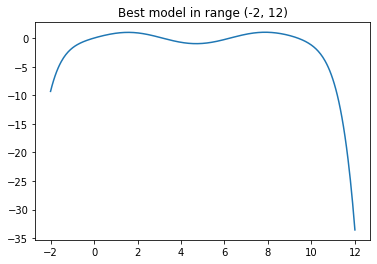

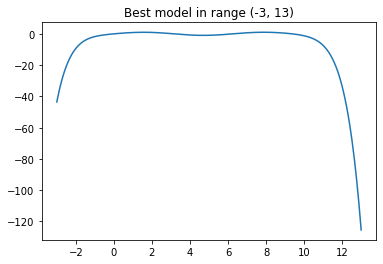

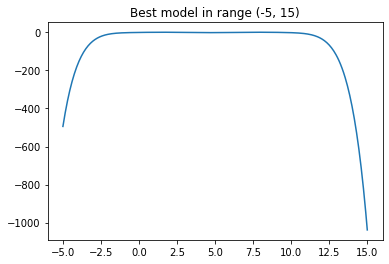

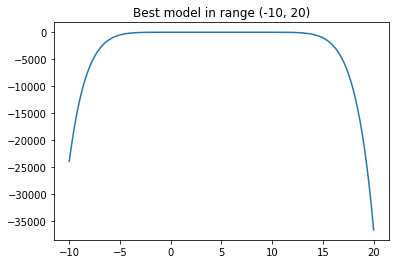

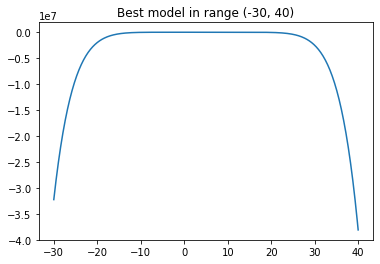

In [62]:
enc, model = encs_models[-1]
deltas = (0, 1, 2, 3, 5, 10, 30)
for delta in deltas:
    _X = np.linspace(-delta, 10 + delta, 400)[:, None]
    _X2 = enc.fit_transform(_X)
    _Yhat = model.predict(_X2)
    plt.title(f'Best model in range (-{delta}, {10+delta})')
    plt.plot(_X, _Yhat)
    plt.show()